<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/027_dnn_search_mean_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.12 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with DNN (Variables: + Search Volume) - Results (2018-2022)**

|Search Volume     |Variables     |
|------------------|--------------|
|Mean of t-4 to t-1|t_sv          |

<br>

### Contents

##### 1. Input Data
*  月營收盈餘 (2013-2022)
*  網路聲量 (2013-2022)：t-4 到 t-1 的平均 (*new)

##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  DNN
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Read Saved Results (*new)
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%

##### 9. Best and Worst Model
*  DNN 預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [4]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [5]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstSingleModel, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [6]:
from MonRevPlot import plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [7]:
from MonRevPlot import plotModelScore, modelScoreBoxplotV

In [8]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [9]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

### **1.1 月營收盈餘 (2013-2022)**

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [10]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [11]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 網路聲量 (2013-2022)：t-4 到 t-1 的平均**

In [12]:
search_volume_data = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_mean.csv'), index_col = 0)
search_volume_data.columns = pd.to_datetime(search_volume_data.columns, format="%Y-%m-%d").to_period('M')
search_volume_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,42.0,42.50,0.00,25.00,25.50,13.00,25.00,0.00,8.00,10.50,...,40.00,36.00,62.00,41.75,41.25,46.25,51.00,36.75,70.75,54.75
1102 亞泥,34.5,0.00,27.50,20.75,20.50,27.75,13.75,22.50,13.75,4.50,...,36.50,30.50,56.25,38.00,32.50,37.50,58.25,26.25,31.75,65.25
1103 嘉泥,0.0,14.50,21.00,31.75,0.00,15.00,8.00,25.00,23.00,24.75,...,10.50,9.75,15.75,15.50,14.00,38.75,7.25,21.25,0.00,7.25
1104 環泥,25.0,0.00,40.00,0.00,0.00,36.25,0.00,0.00,25.00,25.00,...,6.75,33.50,27.00,0.00,0.00,0.00,20.75,5.75,32.00,9.25
1108 幸福,64.5,59.00,76.50,75.00,65.75,66.25,77.50,90.25,74.75,74.25,...,76.75,84.50,78.25,70.00,76.00,86.00,81.25,84.75,82.50,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,14.00,12.50,8.25,4.50,0.00,13.00,19.00,15.75,8.25,...,9.50,34.75,33.75,0.00,11.50,20.25,0.00,0.00,0.00,0.00
9955 佳龍,25.5,7.25,25.00,13.50,29.75,23.75,53.00,0.00,0.00,38.00,...,44.00,30.25,18.25,19.50,30.25,36.50,47.00,54.00,45.00,38.25
9958 世紀鋼,25.0,0.00,24.25,6.25,36.25,0.00,0.00,0.00,9.25,0.00,...,44.75,32.00,30.25,12.25,5.25,19.50,56.50,56.00,53.25,33.00
9960 邁達康,25.0,0.00,52.50,0.00,34.75,0.00,25.50,0.00,0.00,25.00,...,44.75,19.25,28.00,14.25,46.00,4.50,12.25,11.75,46.00,47.00


In [13]:
print("Data shape:", search_volume_data.shape)
print("Data size:", search_volume_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_dnn = os.path.join(project_path, 'model/search_volume/mean/dnn')

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **DNN**

2018 (4.1 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 1466.432  secs.
2018-02 model saved. Using time: 1424.736  secs.
2018-03 model saved. Using time: 1399.629  secs.
2018-04 model saved. Using time: 1512.684  secs.
2018-05 model saved. Using time: 1312.113  secs.
2018-06 model saved. Using time: 1379.249  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2018-07 model saved. Using time: 1369.294  secs.
2018-08 model saved. Using time: 1290.339  secs.
2018-09 model saved. Using time: 1413.957  secs.
2018-10 model saved. Using time: 1404.601  secs.
2018-11 model saved. Using time: 1259.450  secs.
2018-12 model saved. Using time: 1328.077  secs.


2019 (4.7 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 1697.161  secs.
2019-02 model saved. Using time: 1699.811  secs.
2019-03 model saved. Using time: 1581.776  secs.
2019-04 model saved. Using time: 1697.806  secs.
2019-05 model saved. Using time: 1731.086  secs.
2019-06 model saved. Using time: 1659.721  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2019-07 model saved. Using time: 1679.550  secs.
2019-08 model saved. Using time: 1758.862  secs.
2019-09 model saved. Using time: 1695.618  secs.
2019-10 model saved. Using time: 1645.377  secs.
2019-11 model saved. Using time: 1694.897  secs.
2019-12 model saved. Using time: 1701.054  secs.


2020 (5.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 811.102  secs.
2020-02 model saved. Using time: 885.136  secs.
2020-03 model saved. Using time: 918.350  secs.
2020-04 model saved. Using time: 849.907  secs.
2020-05 model saved. Using time: 1041.834  secs.
2020-06 model saved. Using time: 881.944  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2020-07 model saved. Using time: 1472.111  secs.
2020-08 model saved. Using time: 1538.997  secs.
2020-09 model saved. Using time: 1520.616  secs.
2020-10 model saved. Using time: 1565.776  secs.
2020-11 model saved. Using time: 1576.140  secs.
2020-12 model saved. Using time: 1497.854  secs.


2021 (4.8 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 1094.850  secs.
2021-02 model saved. Using time: 1157.030  secs.
2021-03 model saved. Using time: 1051.501  secs.
2021-04 model saved. Using time: 1063.542  secs.
2021-05 model saved. Using time: 1030.122  secs.
2021-06 model saved. Using time: 1091.991  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2021-07 model saved. Using time: 989.825  secs.
2021-08 model saved. Using time: 978.395  secs.
2021-09 model saved. Using time: 1048.089  secs.
2021-10 model saved. Using time: 914.960  secs.
2021-11 model saved. Using time: 834.484  secs.
2021-12 model saved. Using time: 926.320  secs.


2022 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 945.442  secs.
2022-02 model saved. Using time: 958.781  secs.
2022-03 model saved. Using time: 855.942  secs.
2022-04 model saved. Using time: 968.958  secs.
2022-05 model saved. Using time: 980.203  secs.
2022-06 model saved. Using time: 888.459  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2022-07 model saved. Using time: 1431.665  secs.
2022-08 model saved. Using time: 1331.347  secs.
2022-09 model saved. Using time: 1457.195  secs.
2022-10 model saved. Using time: 1376.834  secs.
2022-11 model saved. Using time: 1371.069  secs.
2022-12 model saved. Using time: 1335.324  secs.


### **5.2.4 Training History**

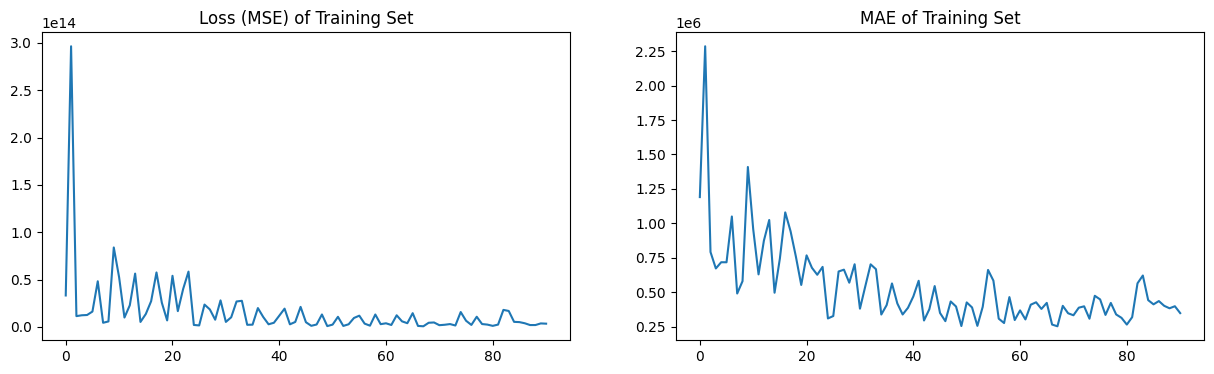

In [ ]:
model_save_path_dnn = os.path.join(project_path, 'model/search_volume/mean/dnn')
plotTrainingHistory(model_save_path_dnn, '2022-12', 'model')

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [14]:
file_category = 'search_volume'
search_volume_type = 'mean'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [15]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [16]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict, searchType: str):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame, searchType: str):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'))

### **7.2 DNN**

In [17]:
# Load trained model
model_save_path_dnn = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/dnn')

In [18]:
# dnn (8 min.)
pred_dnn, scores_dnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

Using time: 414.416  secs.


In [19]:
# Output
outputPredictingResults(file_category, 'dnn', pred_dnn, search_volume_type)
outputScores(file_category, 'dnn', scores_dnn, search_volume_type)

#### **7.2.1 Predicting Results**

In [20]:
# Original
print(pred_dnn['org']['org'].shape)
print(pred_dnn['org']['dec'].shape)
print(pred_dnn['org']['season'].shape)
pred_dnn['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,7628450.0,6743488.0,8888700.0,8408626.0,8679030.0,9496388.0,9816984.0,11130148.0,10098723.0,11281332.0,...,9837438.0,9873823.0,7491685.0,7678458.0,8977018.0,8987004.0,11253156.0,11834505.0,10634279.0,11754657.0
1102 亞泥,4936762.0,4581692.0,5854189.0,5440172.0,5866182.0,6117846.0,6574590.0,7722912.0,6837180.0,7773494.0,...,7957199.0,8102420.0,7492877.0,7640789.0,7817174.0,8495411.0,8639221.0,9014716.0,8216106.0,8876920.0
1103 嘉泥,150268.0,81681.0,185308.0,173164.0,177566.0,186130.0,146945.0,258469.0,198203.0,151463.0,...,184030.0,193479.0,172856.0,177457.0,161666.0,158357.0,214172.0,171271.0,189541.0,195686.0
1104 環泥,382801.0,189392.0,392213.0,356826.0,374996.0,348623.0,329005.0,414955.0,337888.0,316841.0,...,561724.0,555326.0,555567.0,581678.0,546707.0,601906.0,715059.0,621074.0,479470.0,643519.0


In [21]:
# Deflating
print(pred_dnn['def']['org'].shape)
print(pred_dnn['def']['dec'].shape)
print(pred_dnn['def']['season'].shape)
pred_dnn['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,7261545.0,7473539.0,8782974.0,8790711.0,9697494.0,10614246.0,10486357.0,11225440.0,10494124.0,9149933.0,...,8943793.0,9950277.0,8177386.0,8567838.0,9167695.0,9503692.0,10637654.0,10705258.0,11049275.0,11998632.0
1102 亞泥,4835706.0,4700523.0,6075803.0,5745692.0,6225238.0,6646150.0,7392283.0,7571212.0,7080006.0,6400110.0,...,7653047.0,8220086.0,7644755.0,8422656.0,8520479.0,7730352.0,7872805.0,7550875.0,7980944.0,9544110.0
1103 嘉泥,154813.0,138173.0,182357.0,184199.0,182267.0,195992.0,181861.0,185560.0,189847.0,175724.0,...,170197.0,195301.0,174724.0,169602.0,178608.0,182664.0,189580.0,195487.0,212318.0,218511.0
1104 環泥,351951.0,349440.0,387339.0,390703.0,374045.0,417776.0,377704.0,372228.0,370215.0,374389.0,...,510788.0,558344.0,557400.0,552952.0,569227.0,555539.0,585091.0,576087.0,625839.0,645931.0


### **7.4 Scores**

In [22]:
scores_dnn

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2018-01,1639359.0,274048.0,0.1407,0.4331,1252802.0,243227.0,0.1249,0.2573,1457406.0,265942.0,...,0.1230,4.5670,1788284.0,309901.0,0.1591,0.5840,1278752.0,239945.0,0.1232,0.2714
2018-02,1039955.0,239994.0,0.1611,0.5625,1755245.0,227895.0,0.1529,0.3475,1652142.0,261054.0,...,0.1886,0.4517,2395981.0,292750.0,0.1965,0.6361,2556301.0,307060.0,0.2061,0.4801
2018-03,1470868.0,223832.0,0.1192,0.4083,1630293.0,209387.0,0.1115,0.2340,1241105.0,221770.0,...,0.1039,0.2625,1860682.0,289644.0,0.1543,0.8423,2330133.0,271512.0,0.1446,0.2862
2018-04,876757.0,235981.0,0.1316,1.2088,1113181.0,183927.0,0.1025,0.3830,1010517.0,239531.0,...,0.1511,1.2064,928107.0,265793.0,0.1482,1.5537,1710108.0,227312.0,0.1267,0.4542
2018-05,1230391.0,232542.0,0.1228,0.7025,967371.0,210426.0,0.1111,0.1989,978234.0,226016.0,...,0.0696,0.2060,1215234.0,256380.0,0.1354,0.4246,1407788.0,221170.0,0.1168,0.2897
2018-06,1852747.0,248722.0,0.1299,0.6828,1031421.0,178130.0,0.0930,0.2549,1567156.0,241252.0,...,0.0808,0.2796,1528879.0,268359.0,0.1402,0.4546,1474799.0,226470.0,0.1183,0.3265
2018-07,1143074.0,201760.0,0.1025,0.5722,631952.0,125593.0,0.0638,0.3499,658241.0,187048.0,...,0.0632,0.3125,831509.0,222973.0,0.1133,0.7659,846826.0,176152.0,0.0895,0.4956
2018-08,1161031.0,195916.0,0.0952,0.5075,687331.0,131629.0,0.0639,0.2610,726309.0,166238.0,...,0.0770,0.5555,960946.0,226005.0,0.1098,0.4108,1381686.0,198823.0,0.0966,0.3694
2018-09,2786796.0,263931.0,0.1182,0.4033,3724333.0,241411.0,0.1081,0.3408,1879851.0,277024.0,...,0.0985,0.2467,3585748.0,343667.0,0.1539,1.1895,3741461.0,284528.0,0.1274,0.4542
2018-10,1087200.0,215959.0,0.0943,0.3610,4682208.0,379536.0,0.1657,0.1969,1266147.0,273135.0,...,0.0750,0.2085,3623579.0,453721.0,0.1981,0.8469,5101940.0,408234.0,0.1783,0.2346


In [23]:
# Mean socres
scores_dnn.mean()

RMSE-org           2.100267e+06
MAE-org            2.997155e+05
MAE%-org           1.391967e-01
MAPE-org           3.678820e+00
RMSE-def           2.132194e+06
MAE-def            2.485008e+05
MAE%-def           1.150317e-01
MAPE-def           4.397583e-01
RMSE-dec           2.135450e+06
MAE-dec            3.227351e+05
MAE%-dec           1.501667e-01
MAPE-dec           1.794803e+00
RMSE-dec_def       1.846739e+06
MAE-dec_def        2.329237e+05
MAE%-dec_def       1.089400e-01
MAPE-dec_def       4.707850e-01
RMSE-season        2.663070e+06
MAE-season         3.749027e+05
MAE%-season        1.735783e-01
MAPE-season        2.170038e+00
RMSE-season_def    2.866017e+06
MAE-season_def     3.088387e+05
MAE%-season_def    1.446367e-01
MAPE-season_def    6.491917e-01
dtype: float64

## **8. Plots**


### **8.0 Read Saved Results**
2023.06.11

In [24]:
# # Output data path
# output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'
# file_category = 'search_volume'
# search_volume_type = 'mean'

# # 預測年月
# start_y = 2018
# start_m = 1
# end_y = 2022
# end_m = 12

In [25]:
# def getPredictingResults(category: str, modelName: str, searchType: str):
#     pred = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0), 
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             },
#             'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             }
#     }
#     return pred

# def getScores(category: str, modelName: str, searchType: str):
#     scoresD = pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#     return scoresD

In [26]:
# pred_dnn = getPredictingResults(file_category, 'dnn', search_volume_type)
# scores_dnn = getScores(file_category, 'dnn', search_volume_type)

### **8.1 Expected v.s. Predicted**

#### **8.1.2 分模型畫圖**

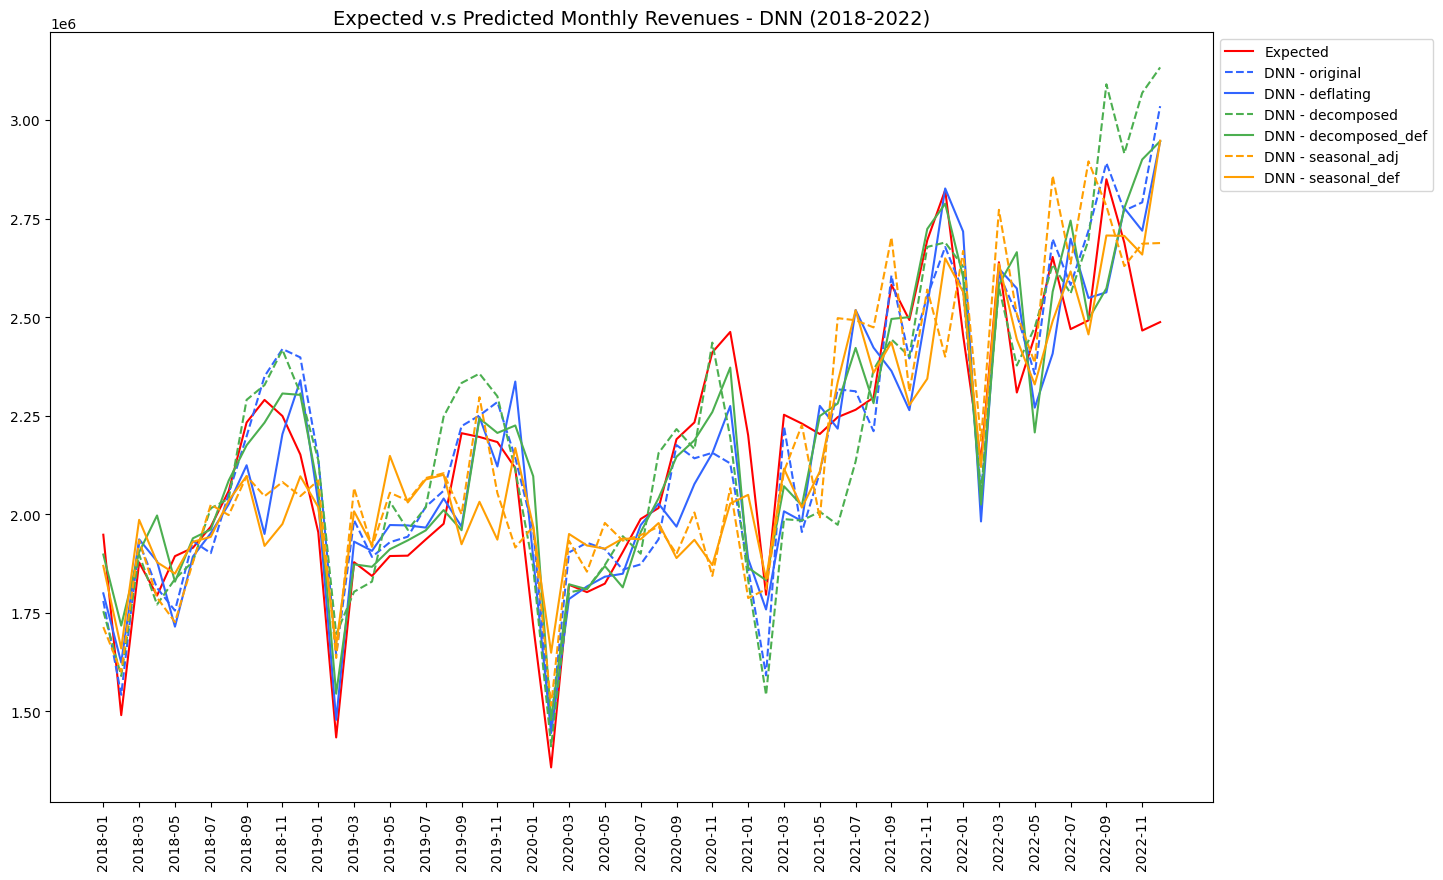

In [27]:
plotModelExpectedPredictedRevenues(org_data, pred_dnn, 'dnn', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.2 分模型畫圖**

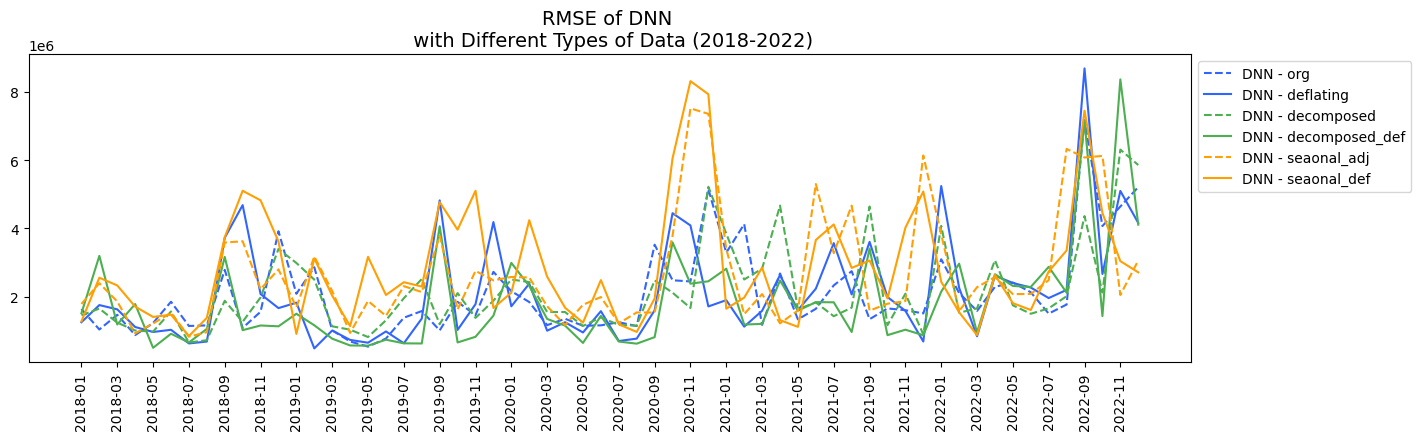

In [28]:
# RMSE
plotModelScore(scores_dnn, 'DNN', 'RMSE', start_y)

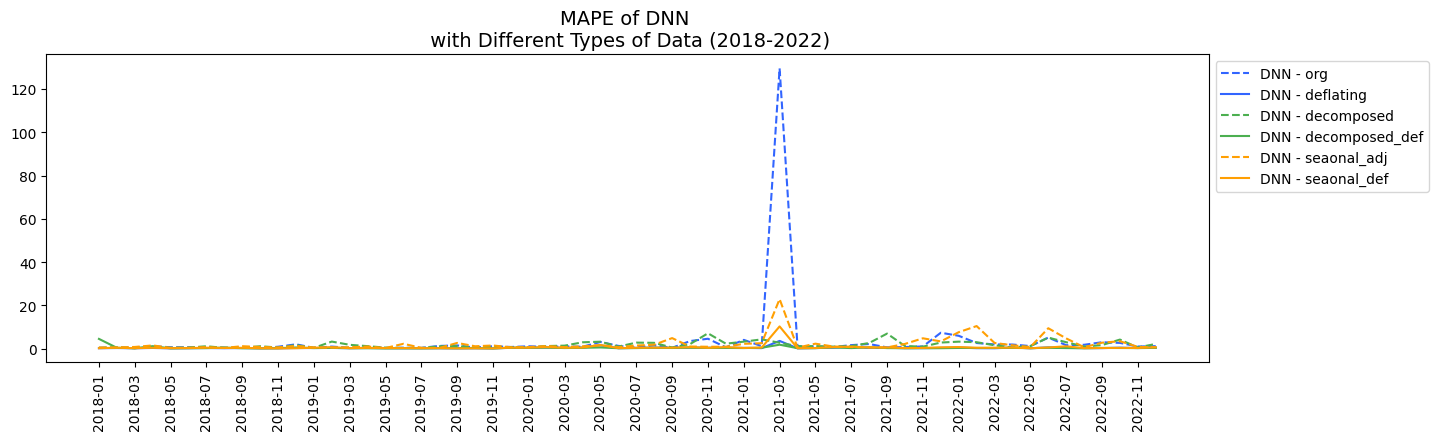

In [29]:
# MAPE
plotModelScore(scores_dnn, 'DNN', 'MAPE', start_y)

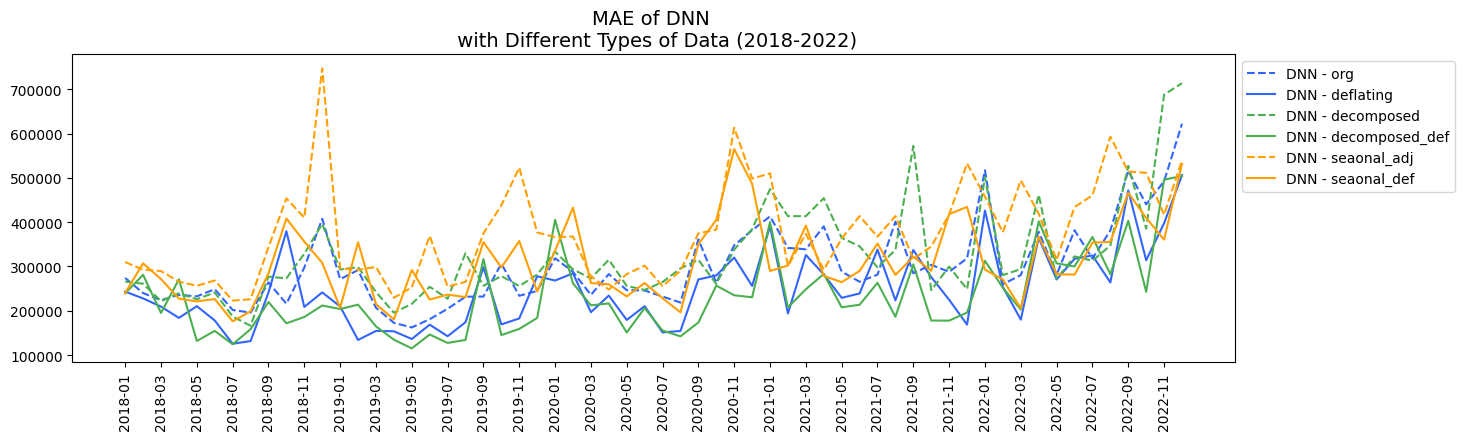

In [30]:
# MAE
plotModelScore(scores_dnn, 'DNN', 'MAE', start_y)

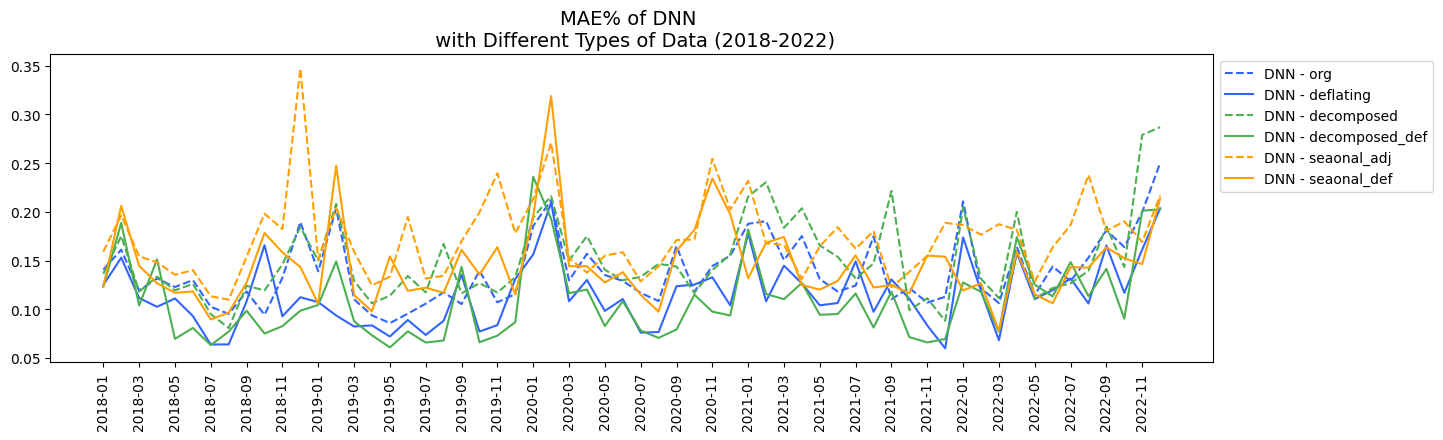

In [31]:
# MAE%
plotModelScore(scores_dnn, 'DNN', 'MAE%', start_y)

#### **8.2.3 Boxplot**

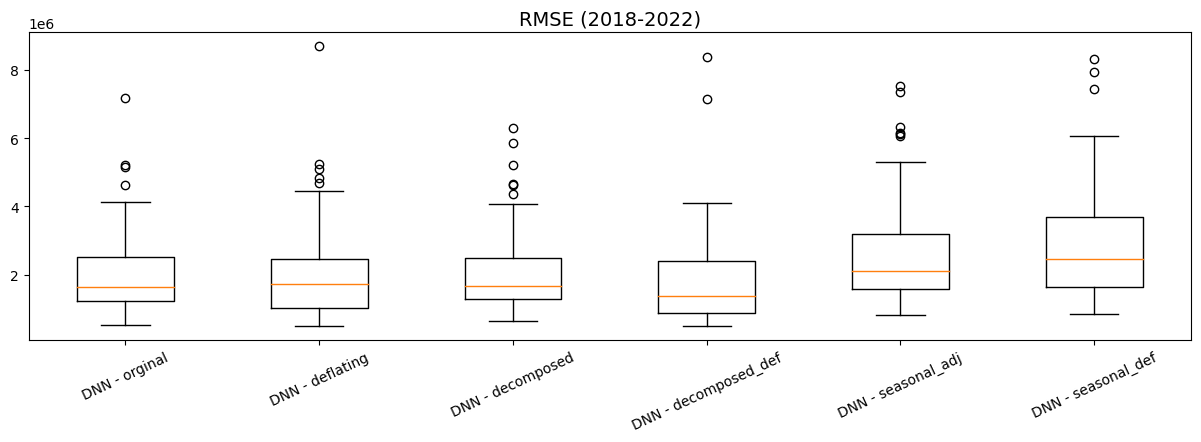

In [32]:
# RMSE
modelScoreBoxplotV(scores_dnn, 'RMSE', start_y) 

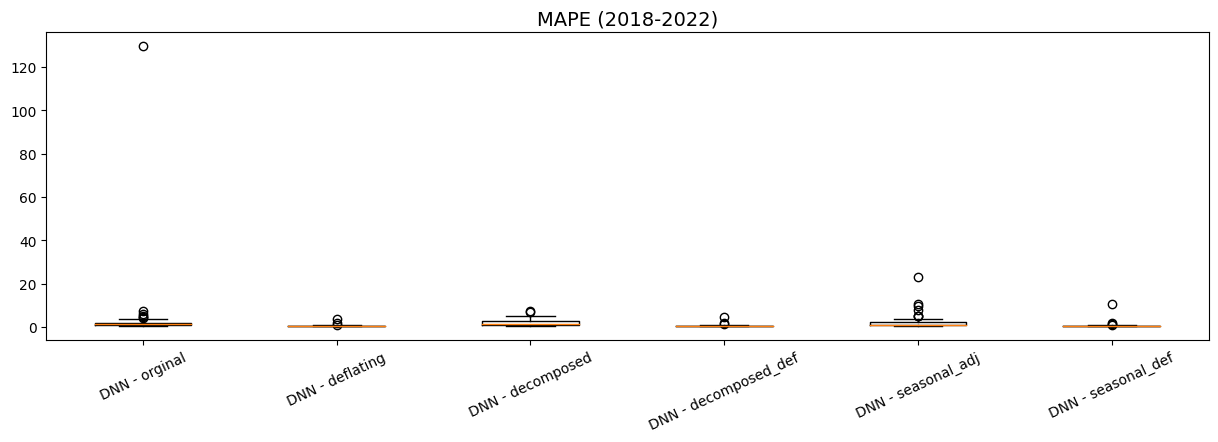

In [33]:
# MAPE
modelScoreBoxplotV(scores_dnn, 'MAPE', start_y) 

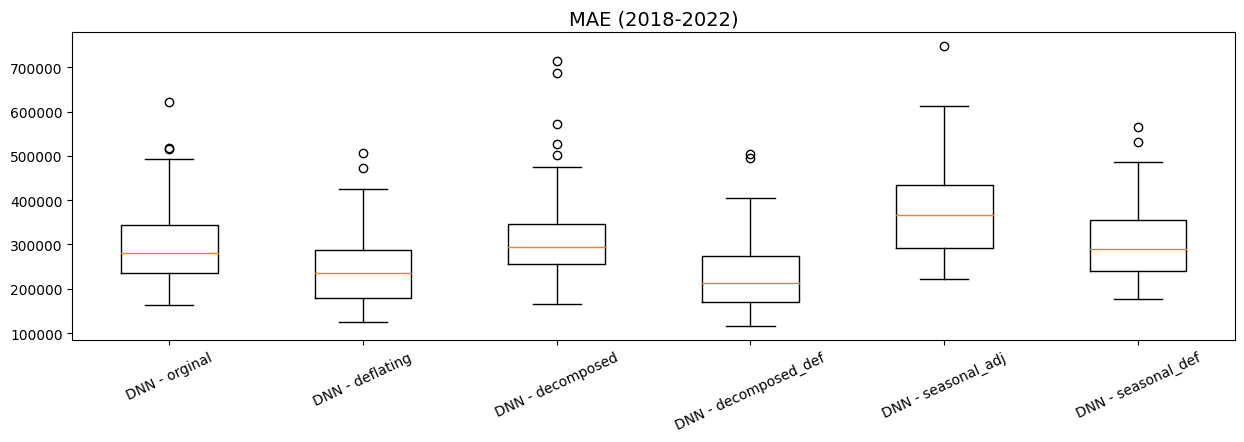

In [34]:
# MAE
modelScoreBoxplotV(scores_dnn, 'MAE', start_y) 

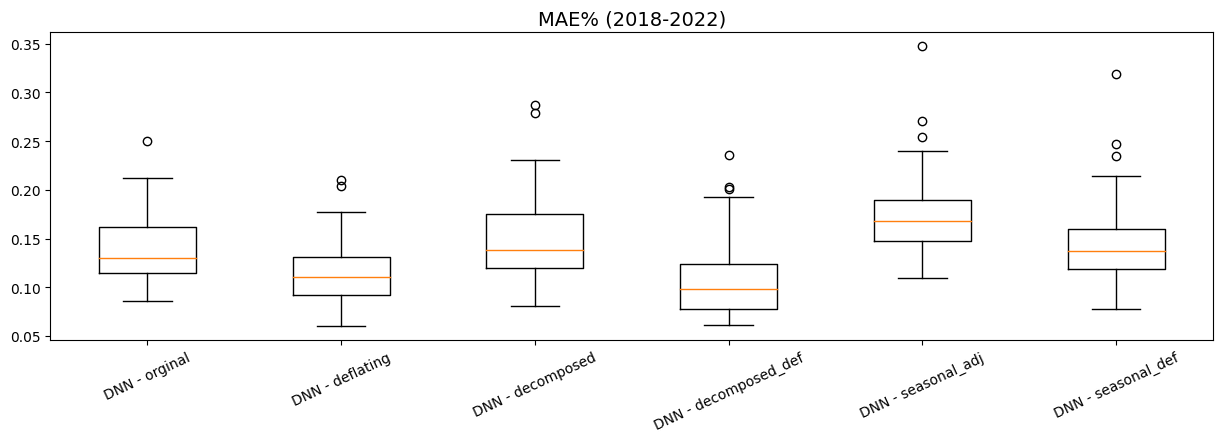

In [35]:
# MAE%
modelScoreBoxplotV(scores_dnn, 'MAE%', start_y) 

## **9. Best and Worst Model**

In [36]:
bw = BestWorstSingleModel(scores_dnn, 'DNN')

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|6|4|2 (fixed)|1x6x4x2 = 48|

#### **9.1.1 RMSE**

In [37]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [38]:
best_rmse

,modelName,dataType,scoreType,min_month,min_score
0,DNN,org,RMSE,2019-05,538288.0
4,DNN,def,RMSE,2019-02,486620.0
8,DNN,dec,RMSE,2018-07,658241.0
12,DNN,dec_def,RMSE,2018-05,503648.0
16,DNN,season,RMSE,2018-07,831509.0
20,DNN,season_def,RMSE,2018-07,846826.0


##### **最差月份**

In [39]:
worst_rmse

,modelName,dataType,scoreType,max_month,max_score
0,DNN,org,RMSE,2022-09,7168358.0
4,DNN,def,RMSE,2022-09,8684646.0
8,DNN,dec,RMSE,2022-11,6307061.0
12,DNN,dec_def,RMSE,2022-11,8363537.0
16,DNN,season,RMSE,2020-11,7514093.0
20,DNN,season_def,RMSE,2020-11,8312027.0


#### **9.1.2 MAPE**

In [40]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [41]:
best_mape

,modelName,dataType,scoreType,min_month,min_score
3,DNN,org,MAPE,2018-10,0.3610
7,DNN,def,MAPE,2019-09,0.1759
11,DNN,dec,MAPE,2018-03,0.2840
15,DNN,dec_def,MAPE,2019-05,0.1789
19,DNN,season,MAPE,2019-05,0.3575
23,DNN,season_def,MAPE,2018-11,0.1819


##### **最差月份**

In [42]:
worst_mape

,modelName,dataType,scoreType,max_month,max_score
3,DNN,org,MAPE,2021-03,129.5305
7,DNN,def,MAPE,2021-03,3.6392
11,DNN,dec,MAPE,2020-11,7.1620
15,DNN,dec_def,MAPE,2018-01,4.5670
19,DNN,season,MAPE,2021-03,22.9632
23,DNN,season_def,MAPE,2021-03,10.3372


#### **9.1.3 MAE**

In [43]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [44]:
best_mae

,modelName,dataType,scoreType,min_month,min_score
1,DNN,org,MAE,2019-05,162397.0
5,DNN,def,MAE,2018-07,125593.0
9,DNN,dec,MAE,2018-08,166238.0
13,DNN,dec_def,MAE,2019-05,115094.0
17,DNN,season,MAE,2018-07,222973.0
21,DNN,season_def,MAE,2018-07,176152.0


##### **最差月份**

In [45]:
worst_mae

,modelName,dataType,scoreType,max_month,max_score
1,DNN,org,MAE,2022-12,622196.0
5,DNN,def,MAE,2022-12,506303.0
9,DNN,dec,MAE,2022-12,713509.0
13,DNN,dec_def,MAE,2022-12,503985.0
17,DNN,season,MAE,2018-12,746972.0
21,DNN,season_def,MAE,2020-11,564865.0


#### **9.1.3 MAE%**

In [46]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [47]:
best_mae_p

,modelName,dataType,scoreType,min_month,min_score
2,DNN,org,MAE%,2019-05,0.0858
6,DNN,def,MAE%,2021-12,0.0598
10,DNN,dec,MAE%,2018-08,0.0807
14,DNN,dec_def,MAE%,2019-05,0.0608
18,DNN,season,MAE%,2018-08,0.1098
22,DNN,season_def,MAE%,2022-03,0.0778


##### **最差月份**

In [48]:
worst_mae_p

,modelName,dataType,scoreType,max_month,max_score
2,DNN,org,MAE%,2022-12,0.2501
6,DNN,def,MAE%,2020-02,0.2096
10,DNN,dec,MAE%,2022-12,0.2869
14,DNN,dec_def,MAE%,2020-01,0.2360
18,DNN,season,MAE%,2018-12,0.3472
22,DNN,season_def,MAE%,2020-02,0.3188


### **9.2 DNN 預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|

#### **9.2.1 RMSE**

##### **最佳模型**

In [49]:
bw.best['RMSE']

,modelName,dataType,scoreType,min_month,min_score
4,DNN,def,RMSE,2019-02,486620.0


##### **最差模型**

In [50]:
bw.worst['RMSE']

,modelName,dataType,scoreType,max_month,max_score
4,DNN,def,RMSE,2022-09,8684646.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [51]:
bw.best['MAPE']

,modelName,dataType,scoreType,min_month,min_score
7,DNN,def,MAPE,2019-09,0.1759


##### **最差模型**

In [52]:
bw.worst['MAPE']

,modelName,dataType,scoreType,max_month,max_score
3,DNN,org,MAPE,2021-03,129.5305


#### **9.2.3 MAE**

##### **最佳模型**

In [53]:
bw.best['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,DNN,dec_def,MAE,2019-05,115094.0


##### **最差模型**

In [54]:
bw.worst['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,DNN,season,MAE,2018-12,746972.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [55]:
bw.best['MAE%']

,modelName,dataType,scoreType,min_month,min_score
6,DNN,def,MAE%,2021-12,0.0598


##### **最差模型**

In [56]:
bw.worst['MAE%']

,modelName,dataType,scoreType,max_month,max_score
18,DNN,season,MAE%,2018-12,0.3472
